In [37]:
# Window에서는 dir을 사용합니다.
%ls data/shop_201806/

매개 변수 형식이 틀립니다 - "shop_201806".


In [2]:
import warnings
warnings.filterwarnings('ignore')
# warning 메시지 제거, warning 메시지는 라이브러리 업데이트나 사용법에 대한 안내 등이 있습니다.
# 코딩을 처음 시작할 때는  warning 메시지가 나오면 당황하실 수도 있어서 제거를 하고 보도록 합니다.
# warning 메시지는 제거하고 보셔도 되지만 Error 메시지를 꼭 고쳐주셔야 합니다.
warnings.filterwarnings('ignore', 'This pattern has match groups')
warnings.filterwarnings('ignore', 'The iterable function was deprecated in Matplotlib')

import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns
# 지도 시각화를 위해
import folium


In [3]:
import matplotlib.pyplot as plt

# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic')

In [30]:
a = pd.read_csv('소상공인시장진흥공단_상가업소정보_201906_01.csv', encoding='UTF-8')

In [31]:
a.shape

(565016, 39)

In [32]:
a = a[a['상권업종소분류명'].str.contains('커피')]
a.shape

(23103, 39)

In [33]:
a = a[a['상호명'].str.contains('빽다방')]
a.shape

(158, 39)

In [34]:
a_seoul = a[a['시도명'].str.contains('서울특별시')]
a_seoul.shape

(135, 39)

In [35]:
a_busan = a[a['시도명'].str.contains('부산광역시')]
a_busan.shape

(23, 39)

In [63]:
a.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [64]:
# 상호명으로 봤을 때 커피점이 12472개가 있다.
a['상호명'].unique().shape

(15205,)

In [69]:
a.loc[a['상호명'].str.contains('빽다방'), '상호명'].count()

In [55]:
a['시도명'].isnull().sum()

0

In [70]:
# 지난 데이터와 마찬가지로 서울과 부산만 있습니다.
# 다른 지역을 참고하고 싶다면 같은 폴더에 있는 다른 파일을 참고해 주세요.
a['시도명'].value_counts()

IndexError: invalid index to scalar variable.

In [57]:
a['시군구명'].unique()

array(['강남구', '영등포구', '중구', '서초구', '성북구', '구로구', '마포구', '종로구', '도봉구',
       '북구', '남구', '기장군', '광진구', '서대문구', '은평구', '해운대구', '양천구', '용산구',
       '관악구', '성동구', '사상구', '금천구', '송파구', '동대문구', '사하구', '강서구', '금정구',
       '동작구', '중랑구', '강북구', '강동구', '수영구', '연제구', '노원구', '부산진구', '동구',
       '동래구', '영도구', '서구'], dtype=object)

In [58]:
a['상권업종중분류명'].value_counts()

커피점/카페    23103
Name: 상권업종중분류명, dtype: int64

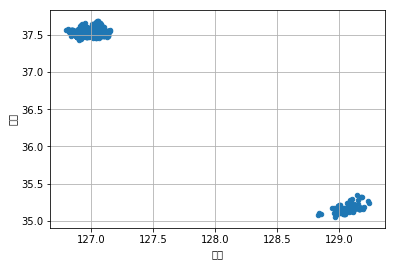

In [59]:
a[:1000].plot.scatter(x="경도", y="위도", grid="True")

In [41]:
df_seoul = a.loc[a['시도명'].str.startswith('서울')].copy()
df_seoul.shape

(18341, 39)

In [42]:
df_seoul['상권업종대분류명'].value_counts()

음식    18341
Name: 상권업종대분류명, dtype: int64

In [43]:
df_seoul.describe(include=np.object)

,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,...,법정동명,대지구분명,지번주소,도로명,건물관리번호,건물명,도로명주소,동정보,층정보,호정보
count,18341,6550,18341,18341,18341,18341,18341,18341,18341,18341,...,18341,18341,18341,18341,18341,9530,18341,909,13831,1839
unique,12391,3962,1,1,1,1,1,1,1,1,...,446,2,13135,4166,13189,5133,13116,149,50,325
top,간단하지만특별한화피디Cafe,강남점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,...,역삼동,대지,서울특별시 강남구 삼성동 159,서울특별시 강남구 테헤란로,1168010500101590009016086,코엑스,서울특별시 강남구 영동대로 513,1,1,1
freq,1175,53,18341,18341,18341,18341,18341,18341,18341,18341,...,797,18302,81,183,62,62,71,201,10730,268


In [44]:
df_seoul.loc[df_seoul['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'), '상호명'].shape

(500,)

In [45]:
df_seoul.loc[df_seoul['상호명'].str.contains('이디야|ediya|EDIYA'), '상호명'].shape

(500,)

In [46]:
df_cafe = df_seoul[df_seoul['상호명'].str.contains('스타벅스|starbucks|STARBUCKS|이디야|ediya|EDIYA')]
df_cafe.shape

(1000, 39)

In [47]:
df_cafe.loc[df_cafe['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'), '브랜드명'] = '스타벅스'

In [48]:
df_cafe['브랜드명'] = df_cafe['브랜드명'].fillna('이디야')

In [49]:

df_cafe.loc[df_cafe['브랜드명'].isnull(), '상호명'].head()

Series([], Name: 상호명, dtype: object)

In [50]:
df_cafe[['상호명','브랜드명']].head()

,상호명,브랜드명
1219,스타벅스,스타벅스
1676,이디야커피,이디야
1946,스타벅스종로3가점,스타벅스
2840,스타벅스,스타벅스
2886,이디야커피,이디야


In [51]:
df_cafe['브랜드명'].value_counts()

이디야     500
스타벅스    500
Name: 브랜드명, dtype: int64

In [52]:
geo_df = df_cafe

In [53]:

map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12, tiles='Stamen Toner')

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '스타벅스' :
        icon_color = 'green'
    else:
        icon_color = 'blue'    
        
    # folium.CircleMarker 혹은 folium.features.CircleMarker 오류가 날 경우
    # --> folium.vector_layer.CircleMarker 를 사용합니다.
    folium.CircleMarker(
        location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)


map

In [94]:
df_cafe_brand = pd.DataFrame(
    df_cafe.groupby(['시군구명', '브랜드명'])['상호명'].count()
).reset_index()
df_cafe_brand.columns = ['구', '브랜드명', '매장수']
df_cafe_brand

,구,브랜드명,매장수
0,강남구,스타벅스,84
1,강남구,이디야,44
2,강동구,스타벅스,13
3,강동구,이디야,12
4,강북구,스타벅스,5
5,강북구,이디야,11
6,강서구,스타벅스,17
7,강서구,이디야,41
8,관악구,스타벅스,9
9,관악구,이디야,23


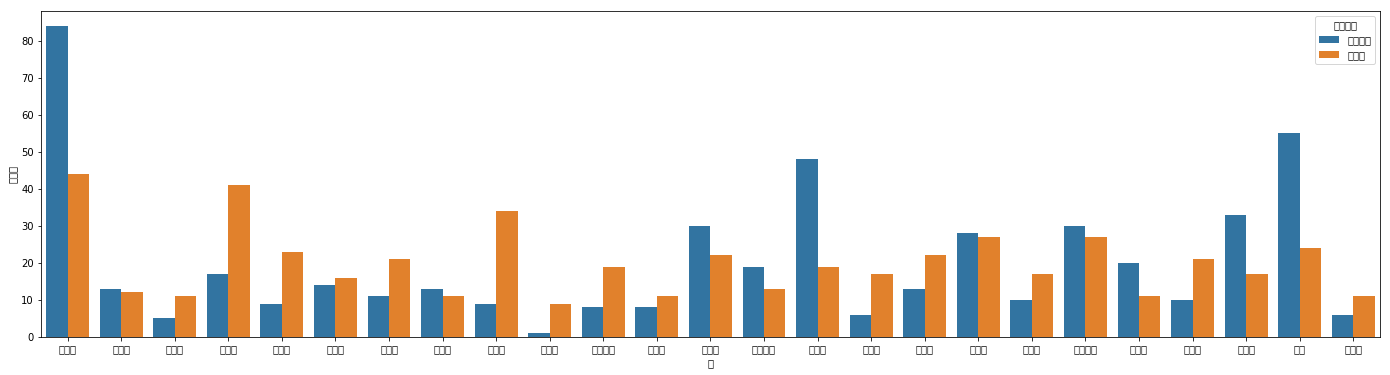

In [95]:
plt.figure(figsize=(24, 6))
sns.barplot(data=df_cafe_brand, x='구', y='매장수', hue='브랜드명')